<a href="https://colab.research.google.com/github/nkrupiy/scratches/blob/master/homework1_%D0%9A%D1%80%D1%83%D0%BF%D0%B8%D0%B9_%D0%9D%D0%B8%D0%BA%D0%BE%D0%BB%D0%B0%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задачи из "Занятие 1, основу numpy, pandas, matplotlib.ipynb"

## Задание 1

Создайте массив массив из 100 элементов (от 1 до 100), переформатируйте в формат (10 * 10), сделайте слайсинг с шагом 2 по каждой оси.

In [323]:
np.array(range(1, 101)).T.reshape(10, 10)[::2,::2]

array([[ 1,  3,  5,  7,  9],
       [21, 23, 25, 27, 29],
       [41, 43, 45, 47, 49],
       [61, 63, 65, 67, 69],
       [81, 83, 85, 87, 89]])

## Задание 2

Написать функцию, которая по заданной длине последовательности находит среднее арифметическое ее членов.

Реализуйте задачу с и без помощи numpy, сравните время выполнения

In [206]:
dlina_posl = 100_000_000
def avg_pos(a):
  sum = 0
  pos = range(a)
  for i in pos: sum += i
  return sum / len(pos)
%time avg_pos(dlina_posl)

CPU times: user 6.8 s, sys: 6.17 ms, total: 6.8 s
Wall time: 6.82 s


49999999.5

In [207]:
dlina_posl = 100_000_000
def np_avg_pos(a):
  pos = np.array(range(a))
  sum = pos.sum()
  return sum / len(pos)
%time np_avg_pos(dlina_posl)
# 🤔 тут, наверное, что-то не так, т.к. получилось медленее...

CPU times: user 14.6 s, sys: 4.78 s, total: 19.4 s
Wall time: 19.4 s


49999999.5

## Задание 3

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5

In [322]:
# задано изначально
import numpy as np, pandas as pd
r = np.random.RandomState(1)
s=pd.Series(r.uniform(0, 10, 100))

# # debug:
# s = pd.Series([1, 3, 0, 5.1, 6, 5, 7])

# Solution:
s = np.sort(s)
# s = s.sort_values()
more5_s = s[s > 5][0]
# more5_s, s
pd.Index(s).get_loc(more5_s)

51

## Задание 4

Предположим, что мы наблюдаем за некоторым признаком нашего датасета, но в данных есть пропуски. Ваша задача: реализовать алгоритм заполнения пропущенных значений последним известным с помощью средств python и pandas. (подсказка: вам может помочь функция np.isnan(), которая возвращает True, если число - nan. Для реализации с пандас стоит посмотреть на метод .fillna).

Изначальный код с инициализацией такого датасета предоставлен.

In [226]:
df.fillna?

(      target
 0   0.012837
 1   0.333588
 2   0.333588
 3   0.350548
 4   0.765417
 ..       ...
 95 -0.655449
 96 -0.851679
 97 -0.706409
 98 -0.273000
 99 -0.508938
 
 [100 rows x 1 columns], [<matplotlib.lines.Line2D at 0x7efcf1b21990>])

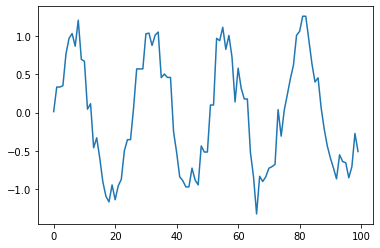

In [228]:
# импортируем библиотеку для создания шума
import random
# библиотека для визуализации
import matplotlib.pyplot as plt

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None
# создадим датафрейм
df = pd.DataFrame({'target':a})

# ваш код тут
df.fillna(method='ffill', inplace=True)

# отобразим
df, plt.plot(df.target.values)

## Задание 5

Имеется небольшой игрушечный датафрейм, в котором необходимо провести несколько типов фильтраций (ответы ищите в решениях) и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [280]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])

# ваш код тут
from pprint import pprint
pprint(
    list(enumerate((
      df,
      df[df['возраст']>40],
      df[df['доход']>df['доход'].mean()],
      df[(df['доход']>df['доход'].mean()) &
        (df['надежность клиента (0..1)']>df['надежность клиента (0..1)'].mean())
      ],
    ), 1)),
)

[(1,
       имя  возраст   доход  надежность клиента (0..1)  пол
0   Петя       45  100000                       0.65  муж
1   Вася       26   80000                       0.74  муж
2    Аня       41  150000                       0.87  жен
3  Света       21   60000                       0.68  жен),
 (2,
      имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж
2   Аня       41  150000                       0.87  жен),
 (3,
      имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж
2   Аня       41  150000                       0.87  жен),
 (4,
     имя  возраст   доход  надежность клиента (0..1)  пол
2  Аня       41  150000                       0.87  жен)]


In [253]:
df['важность клиента'] = df['доход'] * df['надежность клиента (0..1)']
df['возможная долгосрочность клиента'] = df['важность клиента'] * (
    df['возраст'].mean() - df['возраст']
) # *  = важность клиента * (средний возраст по датасету - возраст клиента
df

,имя,возраст,доход,надежность клиента (0..1),пол,важность клиента,возможная долгосрочность клиента
0,Петя,45,100000,0.65,муж,65000.0,-763750.0
1,Вася,26,80000,0.74,муж,59200.0,429200.0
2,Аня,41,150000,0.87,жен,130500.0,-1011375.0
3,Света,21,60000,0.68,жен,40800.0,499800.0


## Задание 6

Посмотрите на блок Exploratory data analysis, используйте данные, кототрые вы загрузили в ходе его освоения. Ваша задача - вывести имена всех выживших детей и их количество

In [255]:
data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
data.head(3)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250


In [273]:
survived_children_df = data[(data['Age'] < 18) & (data['Survived'] == 1)]
print("Total: %s\n" % survived_children_df['Survived'].count(),
      survived_children_df['Name'])

Total: 65
 9           Mrs. Nicholas (Adele Achem) Nasser
10              Miss. Marguerite Rut Sandstrom
22                          Miss. Anna McGowan
39                  Miss. Jamila Nicola-Yarred
42     Miss. Simonne Marie Anne Andree Laroche
                        ...                   
826     Mrs. Antoni (Selini Alexander) Yasbeck
827             Master. George Sibley Richards
849                   Miss. Mary Conover Lines
865             Master. Harold Theodor Johnson
871                   Miss. Adele Kiamie Najib
Name: Name, Length: 65, dtype: object


## Домашнее задание 1
### Основы Python и пакет NumPy
---


In [1]:
import numpy as np
import random
import scipy.stats as sps

### Задача 1
В первой задаче вам предлагается перемножить две матрицы двумя способами -- без использования пакета ***numpy*** и с ним. Использовать матричное произведение.

In [334]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((100,1000))
b = np.random.sample((1000,100))

# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# ========
(
a.ndim, a.shape,
b.ndim, b.shape,
)
# ========

(2, (100, 1000), 2, (1000, 100))

In [331]:
A, B = [1, 2, 3], [4, 5, 6]
def mult(a, b):
    # здесь напишите перемножение матриц без 
    # использования NumPy и выведите результат
    res, A, B = 0, list(a), list(b)
    for i in range(len(A)): res += A[i] * B[i]
    # res = 0
    # for i in range(len(a)): res += a[i] * b[i]
    return res
  
A, B, mult(A, B)

([1, 2, 3], [4, 5, 6], 32)

In [159]:
def np_mult(a, b):
    # здесь напишите перемножение матриц с
    # использованием NumPy и выведите результат
    return np.dot(a, b) # a @ b

A, B, np_mult(A, B)

([1, 2, 3], [4, 5, 6], 32)

In [333]:
# Превратим матрицы в листы, чтобы протестировать функцию без np
a_list = [[x for x in row] for row in a]
b_list = [[x for x in row] for row in b]
# a, b, \
# a_list, b_list

TypeError: ignored

In [ ]:
# pprint
(a_list,
       b_list
)

In [332]:
%%time
# засечем время работы функции без NumPy
mult(a_list, b_list)

TypeError: ignored

In [164]:
%%time
# засечем время работы функции с NumPy
np_mult(a, b)

CPU times: user 2.62 ms, sys: 0 ns, total: 2.62 ms
Wall time: 1.69 ms


array([[252.71187435, 252.34926794, 263.24446936, ..., 248.17774504,
        258.68888646, 253.33435243],
       [239.41466777, 238.41753717, 253.04827493, ..., 233.93358964,
        240.99091825, 243.64006446],
       [251.1527197 , 254.07442682, 268.68634912, ..., 253.54031575,
        260.48158359, 253.31219666],
       ...,
       [243.89400537, 240.10972642, 253.47452574, ..., 239.25007609,
        250.14221501, 239.167813  ],
       [249.02232106, 242.55566538, 256.93951168, ..., 241.76488291,
        248.86680433, 244.82286941],
       [242.27415046, 234.47259483, 254.80133842, ..., 229.90797932,
        249.65438045, 241.27914369]])

### Задача 2
Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.  
Аналогично -- с помощью библиотеки **NumPy** и без нее. Сравните скорость, объясните результат.

In [31]:
np.array?

In [50]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    # Ваш код здесь
    A = np.array(A)
    n = len(A)
    # print(f"{{Ai}}[i=1:n={n}] =", A)
    S = np.array(range(n), float)
    for k in range(1, n+1):
        sum_A1k = 0
        for i in range(k): sum_A1k += A[i]
        S[i] = sum_A1k / k
    return S

A = [1, 2, 3]
A_list = list(A)

A_list \
, sec_av(A_list)

([1, 2, 3], array([1. , 1.5, 2. ]))

In [51]:
# функция без NumPy
def stupid_sec_av(A):
    # Ваш код здесь
    n = len(A)
    # print(f"{{Ai}}[i=1:n={n}] =", A)
    S = []
    for k in range(1, n+1):
        sum_A1k = 0
        for i in range(k): sum_A1k += A[i]
        S += [sum_A1k / k]
    return S

A_list, stupid_sec_av(A_list)

([1, 2, 3], [1.0, 1.5, 2.0])

In [165]:
e = 4 # 6

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10 ** e) 
A_list = list(A)

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A_list)
#проверим корректность:
np.abs(S1 - S2).sum()
# S2

CPU times: user 13.2 s, sys: 23.1 ms, total: 13.2 s
Wall time: 13.2 s
CPU times: user 7.46 s, sys: 7.6 ms, total: 7.47 s
Wall time: 7.47 s


0.0

### Задача 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все элементы с четными индексами исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить (конкатенировать) массив X с преобразованным X и вывести в обратном порядке. 

In [110]:
X = [0, 1, 2, 3]

In [113]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    # Ваш код здесь
    X = np.array(X)
    Y = np.array([0] * len(X))
    for i in range(len(X)):
        Y[-i-1] = X[i]**3 if i % 2 else a
    # Z = np.concatenate((X, Y))
    return np.concatenate((X, Y))[::-1]
# X, \ 
transformation(X, a=1)

array([ 1,  1,  1, 27,  3,  2,  1,  0])

In [111]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X, a=1):
    # Ваш код здесь
    Y = [None] * len(X)
    for i, item in enumerate(X):
        # print(i % 2)
        Y[-i-1] = item**3 if i % 2 else a
    # Y = X + Y
    # Y.sort(reverse=True)
    return (X + Y)[::-1]
# X, \
stupid_transformation(X, a=1)    

[1, 1, 1, 27, 3, 2, 1, 0]

In [116]:
X = sps.uniform.rvs(size=10 ** 3)
X_list = list(X)
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X_list)
# проверим корректность:
print(np.abs(S1 - S2).sum())

CPU times: user 1.13 ms, sys: 0 ns, total: 1.13 ms
Wall time: 1.64 ms
CPU times: user 535 µs, sys: 0 ns, total: 535 µs
Wall time: 539 µs
130.1841835762673


Почему методы ***numpy*** оказываются эффективнее?

1.   Новый пункт
2.   Новый пункт



In [324]:
# Потому что они написаны на C (или C++... не знаю точно 🤓) и "векторизованные" (перебор элементов осуществляется внутри C, а не python'a)

SyntaxError: ignored

## Дополнительные задачи

Дополнительные задачи подразумевают, что Вы самостоятельно разберётесь в некоторых функциях ***numpy***, чтобы их сделать, но в то же время не являются обязательными.

### Задача 4*

Дана функция двух переменных: $f(x, y) = sin(x)cos(y)$ (это просто такой красивый 3D-график), а также дана функция для отрисовки $f(x, y)$ (`draw_f()`), которая принимает на вход двумерную сетку, на которой будет вычисляться функция.  

Вам нужно разобраться в том, как строить такие сетки (подсказка - это одна конкретная функция ***numpy***), и подать такую сетку на вход функции отрисовки.

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def f(x, y):
    '''Функция двух переменных'''
    return np.sin(x) * np.cos(y)

def draw_f(grid_x, grid_y):
    '''Функция отрисовки функции f(x, y)'''
    fig = plt.figure(figsize=(10, 8))
    ax = Axes3D(fig)
    ax.plot_surface(grid_x, grid_y, f(grid_x, grid_y), cmap='inferno')
    plt.show()

In [ ]:
grid_x, grid_y = # Ваш ответ

draw_f(grid_x, grid_y)

### Задача 5*

Вам дана картинка. При загрузке её размерность равна 3: **(w, h, num_channels)**, где **w** - ширина картинки в пикселях, **h** - высота картинки в пикселях, **num_channels** - количество каналов *(R, G, B, alpha)*.

Вам нужно "развернуть" картинку в одномерный массив размера w \* h \* num_channels, написав **одну строку кода**.

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

Загрузим картинку. Если эта ячейка не сработает, смотрите дальше:

In [ ]:
path_to_image = './image.jpg'
image_array = plt.imread(path_to_image)

Если Вы работаете в google colab или по каким-то еще причинам картинка с диска не загрузилась, можно попробовать загрузить через ссылку в интернете:

In [ ]:
from PIL import Image
import requests
from io import BytesIO

path_to_image = '__enter your image URL here__'
# например: https://github.com/hocop/sberbank_madmo/raw/master/day_1/homework/image.jpg

response = requests.get(path_to_image)
img = Image.open(BytesIO(response.content))

image_array = np.array(img)

В любом случае, у Вас должен появиться объект `image_array`.  
Распечатаем его на экране:

In [ ]:
plt.imshow(image_array);

In [ ]:
# Ваш код здесь

In [ ]:
# Здесь выведите размерность нового массива